# Function definitions and loading files

In [1]:
from utils_plot import *

In [2]:
btc_to_usd_in_2020_11_24 = 18875.10

## Load txs acceleration price data

In [3]:
tx_acceleration_df = pd.read_csv('data/tx_acceleration_prices_2020-11-24 10:08:41.932872.tsv.gz', sep=';')
tx_acceleration_df.rename(columns={'size': 'ssize'}, inplace=True)

In [4]:
tx_acceleration_df['final_price_usd'] = tx_acceleration_df['price_usd'] - tx_acceleration_df['discount_usd']

In [5]:
tx_acceleration_df.shape

(23341, 9)

In [6]:
tx_acceleration_df.head()

,txid,ssize,children_total_size,flatten_tree,price_usd,discount_usd,price_cny,discount_cny,final_price_usd
0,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274,482,450,"897a5a82f1b8d24041550834f61894ab0b8ff6a4af0bc4d71a1a04cacc31b42c,a7949253e803b51f61282cb68c4efb03bdf8929bba4a467effc84841f0fde3d9,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274",173.31,26.13,1139.53,171.85,147.18
1,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,214,0,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,39.79,0.93,261.62,6.16,38.86
2,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,224,0,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,41.65,1.12,273.85,7.38,40.53
3,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,1513,0,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,281.35,58.54,1849.90,384.97,222.81
4,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,225,0,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,41.84,1.14,275.10,7.50,40.70


In [7]:
tx_acceleration_df.final_price_usd.describe()

count    23341.00000000
mean       199.72862988
std        744.65238365
min         34.34000000
25%         40.70000000
50%         64.97000000
75%        120.59000000
max      20969.86000000
Name: final_price_usd, dtype: float64

## Load mempool data

#### 1 BTC worths 18,875.10 USD on November 24th, 2020

In [8]:
mempool_df = pd.read_csv('data/mempool_df_2020-11-24 10:08:41.932872.tsv.gz', sep=';')
mempool_df.rename(columns={'size': 'vsize'}, inplace=True)

In [9]:
mempool_df['fee_usd'] = (mempool_df['fee'] * btc_to_usd_in_2020_11_24).round(2)

In [10]:
mempool_df.shape

(26332, 17)

In [11]:
mempool_df.head()

,txid,fees,vsize,fee,modifiedfee,time,height,descendantcount,descendantsize,descendantfees,ancestorcount,ancestorsize,ancestorfees,wtxid,depends,spentby,fee_usd
0,379299a2da48278667039202266ad90a35c901bd8e9bbc86f7a284c8da56fe04,"{'base': 4.54e-05, 'modified': 4.54e-05, 'ancestor': 5.86e-05, 'descendant': 0.00012882}",224,0.00004540,0.00004540,2020-11-24 08:42:06,658433,2,414,12882,2,450,5860,379299a2da48278667039202266ad90a35c901bd8e9bbc86f7a284c8da56fe04,['41fb690ea461eb90b6dd5dbdf25eaa538fa1e7e9e285ed1ca6bbbe520a0614d0'],['978b3d96dca544516bbc93b5d44bddf1b81315fc7b0e6e6a1e7e53555b835512'],0.86
1,a5983f469cdbbc3e1357ea2122daf20a3bbc64eee3cabad5ddccefd33c432b7a,"{'base': 0.0, 'modified': 0.0, 'ancestor': 0.0, 'descendant': 0.0}",340,0.00000000,0.00000000,2020-11-10 11:51:32,656288,1,340,0,1,340,0,a5983f469cdbbc3e1357ea2122daf20a3bbc64eee3cabad5ddccefd33c432b7a,[],[],0.00
2,b3e83576397e19657c8eab6dd5dc0238006e5e046d4fd27d7df1e04be7fa7fc6,"{'base': 4.096e-05, 'modified': 4.096e-05, 'ancestor': 4.096e-05, 'descendant': 4.096e-05}",271,0.00004096,0.00004096,2020-11-24 08:11:05,658432,1,271,4096,1,271,4096,b3e83576397e19657c8eab6dd5dc0238006e5e046d4fd27d7df1e04be7fa7fc6,[],[],0.77
3,a7c3de64c7e6337343051e96e608e7d62ffd47571bb499a8460bfcb7b3a28a8d,"{'base': 0.0, 'modified': 0.0, 'ancestor': 0.0, 'descendant': 0.0}",340,0.00000000,0.00000000,2020-11-10 11:51:32,656288,1,340,0,1,340,0,a7c3de64c7e6337343051e96e608e7d62ffd47571bb499a8460bfcb7b3a28a8d,[],[],0.00
4,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,"{'base': 0.00019884, 'modified': 0.00019884, 'ancestor': 0.00019884, 'descendant': 0.00019884}",1513,0.00019884,0.00019884,2020-11-24 09:20:07,658436,1,1513,19884,1,1513,19884,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,[],[],3.75


In [12]:
mempool_df[['fee', 'fee_usd']].describe()

,fee,fee_usd
count,26332.00000000,26332.00000000
mean,0.00010557,1.99282394
std,0.00068095,12.85300172
min,0.00000000,0.00000000
25%,0.00001135,0.21000000
50%,0.00003842,0.73000000
75%,0.00008160,1.54000000
max,0.06040421,1140.14000000


# Analysis

In [13]:
tx_acceleration_df.columns

Index(['txid', 'ssize', 'children_total_size', 'flatten_tree', 'price_usd',
       'discount_usd', 'price_cny', 'discount_cny', 'final_price_usd'],
      dtype='object')

In [14]:
mempool_df.columns

Index(['txid', 'fees', 'vsize', 'fee', 'modifiedfee', 'time', 'height',
       'descendantcount', 'descendantsize', 'descendantfees', 'ancestorcount',
       'ancestorsize', 'ancestorfees', 'wtxid', 'depends', 'spentby',
       'fee_usd'],
      dtype='object')

In [15]:
mempool_df.query('txid == "bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f"')

,txid,fees,vsize,fee,modifiedfee,time,height,descendantcount,descendantsize,descendantfees,ancestorcount,ancestorsize,ancestorfees,wtxid,depends,spentby,fee_usd
29,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,"{'base': 9.38e-06, 'modified': 9.38e-06, 'ancestor': 9.38e-06, 'descendant': 9.38e-06}",133,0.00000938,0.00000938,2020-11-23 19:48:22,658365,1,133,938,1,133,938,bd3ce42f9011ca0b74be2de78f744360898bc2dc729b157731ede3b3c75289eb,[],[],0.18


In [16]:
tx_acceleration_df.query('txid == "bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f"')

,txid,ssize,children_total_size,flatten_tree,price_usd,discount_usd,price_cny,discount_cny,final_price_usd
1,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,214,0,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,39.79,0.93,261.62,6.16,38.86


In [17]:
df = mempool_df.merge(tx_acceleration_df, right_on='txid', left_on='txid', how='right')
df['children_vsize'] = df['ancestorsize'] - df['vsize']

In [18]:
df.shape

(23341, 26)

In [19]:
df.head()

,txid,fees,vsize,fee,modifiedfee,time,height,descendantcount,descendantsize,descendantfees,...,fee_usd,ssize,children_total_size,flatten_tree,price_usd,discount_usd,price_cny,discount_cny,final_price_usd,children_vsize
0,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274,"{'base': 0.00020131, 'modified': 0.00020131, 'ancestor': 0.00024651, 'descendant': 0.00020131}",482,0.00020131,0.00020131,2020-11-24 09:39:00,658436,1,482,20131,...,3.80,482,450,"897a5a82f1b8d24041550834f61894ab0b8ff6a4af0bc4d71a1a04cacc31b42c,a7949253e803b51f61282cb68c4efb03bdf8929bba4a467effc84841f0fde3d9,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274",173.31,26.13,1139.53,171.85,147.18,450
1,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,"{'base': 9.38e-06, 'modified': 9.38e-06, 'ancestor': 9.38e-06, 'descendant': 9.38e-06}",133,0.00000938,0.00000938,2020-11-23 19:48:22,658365,1,133,938,...,0.18,214,0,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,39.79,0.93,261.62,6.16,38.86,0
2,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,"{'base': 3.088e-05, 'modified': 3.088e-05, 'ancestor': 3.088e-05, 'descendant': 8.56e-05}",224,0.00003088,0.00003088,2020-11-24 08:16:15,658433,2,563,8560,...,0.58,224,0,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,41.65,1.12,273.85,7.38,40.53,0
3,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,"{'base': 0.00019884, 'modified': 0.00019884, 'ancestor': 0.00019884, 'descendant': 0.00019884}",1513,0.00019884,0.00019884,2020-11-24 09:20:07,658436,1,1513,19884,...,3.75,1513,0,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,281.35,58.54,1849.90,384.97,222.81,0
4,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,"{'base': 2.497e-05, 'modified': 2.497e-05, 'ancestor': 2.497e-05, 'descendant': 2.497e-05}",225,0.00002497,0.00002497,2020-11-24 07:52:16,658431,1,225,2497,...,0.47,225,0,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,41.84,1.14,275.10,7.50,40.70,0


## Transaction fee vs acceleration price

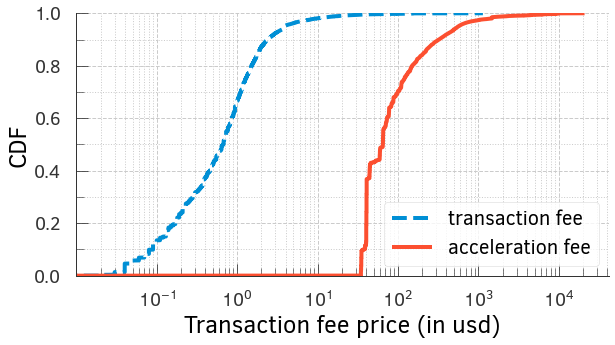

In [20]:
ax = plot_cdf(data=mempool_df.query('txid in @tx_acceleration_df.txid').fee_usd, x_label='Transaction fee price (in usd)', y_label='CDF', log=True, interval=None,
             color=None, ax=None, label='transaction fee',
             linewidth=None, style='--', alpha=1, y_lim=[0, 1], marker=None, markersize=None)
ax = plot_cdf(data=tx_acceleration_df.final_price_usd, x_label='Transaction fee price (in usd)', y_label='CDF', log=True, interval=None,
             color=None, ax=ax, label='acceleration fee',
             linewidth=None, style='-', alpha=1, y_lim=[0, 1], marker=None, markersize=None)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))
plt.grid(which='minor', axis='both', linestyle=':')
plt.legend()
plt.savefig(f"plots/fees-cdf.pdf", bbox_inches='tight')

In [21]:
(100*(df['fee_usd']/df['final_price_usd']).describe()).round(2)

count    2334100.00
mean           1.25
std            1.80
min            0.00
25%            0.28
50%            0.86
75%            1.94
max          182.94
dtype: float64

In [22]:
(df['final_price_usd']/df['fee_usd']).describe()

count     23341.00000000
mean        566.29502157
std        4734.67428849
min           0.54661280
25%          51.63546798
50%         116.63900415
75%         351.80000000
max      428800.00000000
dtype: float64

In [23]:
data = df[
    ['fee_usd', 'final_price_usd', 'vsize', 'ssize', 'children_total_size', 'ancestorsize']
].describe().round(2)
data.describe()

,fee_usd,final_price_usd,vsize,ssize,children_total_size,ancestorsize
count,8.00000000,8.00000000,8.00000000,8.00000000,8.00000000,8.00000000
mean,3062.09000000,5689.48000000,16054.21250000,32013.62625000,29763.76000000,16272.16125000
std,8203.58092017,10185.36655155,34669.62828753,78156.40005491,73013.10715173,34572.98926534
min,0.02000000,34.34000000,110.00000000,187.00000000,0.00000000,110.00000000
25%,0.55500000,58.90250000,216.75000000,240.50000000,0.00000000,249.00000000
50%,1.52500000,160.16000000,589.90500000,739.96000000,307.96000000,949.35000000
75%,293.75750000,5800.95250000,8691.91750000,10478.56750000,9423.37000000,9416.19250000
max,23341.00000000,23341.00000000,99577.00000000,224440.00000000,209369.00000000,99577.00000000


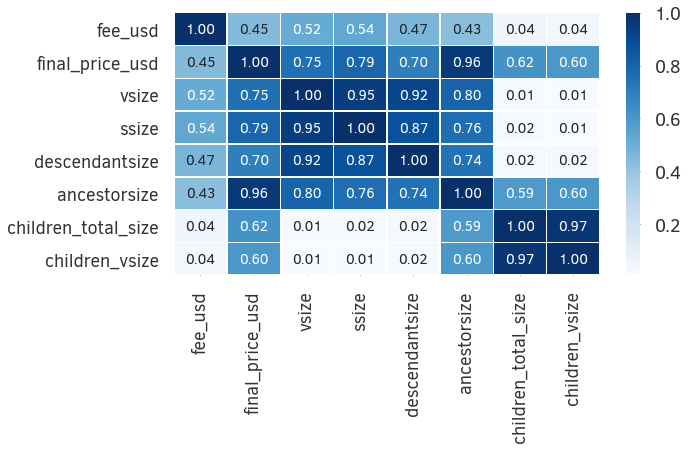

In [24]:
sns.heatmap(
    df[['fee_usd', 'final_price_usd', 'vsize', 'ssize', 'descendantsize', 
        'ancestorsize', 'children_total_size', 'children_vsize']].corr(), 
    annot=True, cmap='Blues', cbar=True, linewidths=.5, annot_kws={"size": 14},
    fmt='.2f'
)
plt.savefig(f"plots/fees-corr-heatmap.pdf", bbox_inches='tight')

In [25]:
df.sort_values(
    by=['ancestorsize', 'final_price_usd', 'ssize', 'vsize', 'final_price_usd']
)[
    ['txid', 'final_price_usd', 'fee_usd', 'ancestorsize', 'ssize', 'vsize',
     'descendantsize', 'fee', 'time', 'height']].head(10)

,txid,final_price_usd,fee_usd,ancestorsize,ssize,vsize,descendantsize,fee,time,height
43,c95c7d6de83b8c918fe9dc146a9d7f311338d42e593097de1bbcd12e0eef91d5,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:15:58,658312
173,d22044704f09f478bf3fbff8ab47493e06feb385a8a610111b426e29808f3344,35.01,0.07,110,191,110,492,0.00000387,2020-11-23 11:00:21,658312
339,e267a47a38897b2a7a8ca054ce38c437f02b0c12038e5b0e19e2c0d37cbb6796,35.01,0.07,110,191,110,110,0.00000363,2020-11-23 13:29:13,658326
383,d4b48ba264f42178dc82c1f6134b78688740d2021b26da735fe758d80041001f,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:21:17,658312
1148,f30bfc8c789775b42c56575eba1277ab7d4ed501c27f564eec39b8ae1c077f30,35.01,0.25,110,191,110,110,0.00001320,2020-11-24 02:27:37,658400
1518,dfe1a5dbd74938fb7a1746dc1677a79d93cbf0d4ec180b68aed7f66201b473cf,35.01,0.21,110,191,110,110,0.00001100,2020-11-23 14:14:38,658332
1522,a2a6799a763a514b7ef92a6d4676ae7cd08072d759f754a8d7c185c353fdce5a,35.01,0.27,110,191,110,110,0.00001430,2020-11-23 10:57:49,658312
1623,34fbfc93045b9d96f1c025b79c70f6a11782f6d0d6f28c859d9e2d8f8fe770ec,35.01,0.08,110,191,110,110,0.00000440,2020-11-23 10:58:38,658312
1958,fdb39f9cbc9a7cb86444900e43575717fbc5b96d0a7ce97ad2fe6555080381f3,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:18:36,658312
2058,f3f63aa781b62c222aaad0cc65204f4ef3e8f8a63815480458774cd1b7bd45dc,35.01,0.12,110,191,110,110,0.00000660,2020-11-23 11:01:55,658312


# Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Preparing data set

In [27]:
features = ['fee', 'vsize', 'ssize', 'children_vsize', 'ancestorsize', 'children_total_size']
target = 'final_price_usd'

In [28]:
data = df[features+[target]]
data.shape

(23341, 7)

In [29]:
train_df, test_df = train_test_split(data, test_size=0.2, shuffle=True)
print(f"train={train_df.shape[0]}, test={test_df.shape[0]}")

train=18672, test=4669


## Model

In [30]:
reg = LinearRegression(n_jobs=-1)

In [31]:
reg.fit(X=train_df[features], y=train_df[target])

LinearRegression(n_jobs=-1)

## Evaluation

In [32]:
# Coefficients
print(f"Coefficients\n{dict(zip(features, reg.coef_))}")

# Intercept
print(f"\nIntercept={reg.intercept_}")

Coefficients
{'fee': 2030.3723229365469, 'vsize': -0.0012872669332831086, 'ssize': 0.09205500513902189, 'children_vsize': 0.006175733588319021, 'ancestorsize': 0.004886826268144402, 'children_total_size': 0.08801792495071552}

Intercept=36.777324107730976


In [33]:
pred = reg.predict(test_df[features])
mean_error = mean_squared_error(test_df[target], pred)
coef_determination = r2_score(test_df[target], pred)

In [34]:
print('Mean squared error: %.2f'% mean_error)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% coef_determination)

Mean squared error: 553.11
Coefficient of determination: 1.00


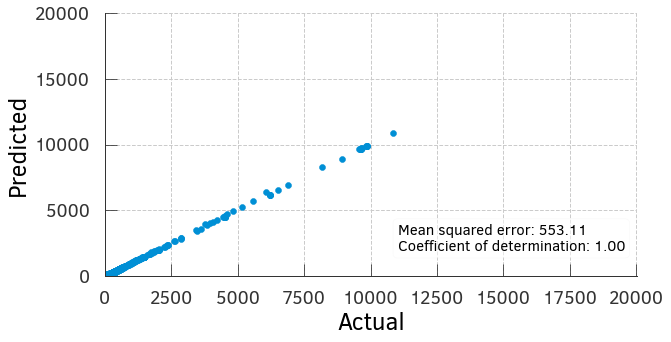

In [35]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(test_df[target], pred)

# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.55, 0.2, 'Mean squared error: %.2f\nCoefficient of determination: %.2f'% 
        (mean_error, coef_determination), transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

ax.set_xlim((0, 20030))
ax.set_ylim((0, 20000))

plt.savefig(f"plots/fees-prediction-scatter.pdf", bbox_inches='tight')

In [36]:
test = df[['txid', 'final_price_usd', 'children_vsize', 'children_total_size', 'vsize', 'ssize']].query('children_vsize > 0')

In [37]:
test.query('children_vsize != children_total_size')

,txid,final_price_usd,children_vsize,children_total_size,vsize,ssize
21,1cb1f3c0f574e5c2641b44483f64d7aefe65bf4bf0fa0676280a73c96134fbd4,84.14,166,247,166,247
26,bb286f3589126093b2327bb08f699c16bd50995253748f7756a47070e51b4a4d,281.54,1148,1796,142,223
33,5e487e82ae7b5a17e335a377dda13b39bbbe87a2f1ce2805f10175e78061f981,144.05,168,249,417,659
41,0a7d7f472cf7d5bc40411c289d0bfea45d7a2e4b93c5c6bc6c4deacbafa5a7c8,681.53,4241,5951,202,283
48,2f9bb32253656b4941a93de5f8166b7a9c0d1678f8fb7d8e9e53347b89181738,215.90,794,1041,257,419
...,...,...,...,...,...,...
23299,36e221491a970d422d4ddf1452fe43ce42b7e5b29f4923d403c32cc910f1f624,120.88,206,371,205,370
23310,2a613935a525cb912b2b435aa4a60652148408bd0192c89bbc2edf7566a9766b,471.68,2317,3604,373,373
23318,c950b73dbdcb79f1049eeed3e2cdac088845d282e2bc4493c55f6de4930296d1,868.97,7456,8024,226,226
23327,783c702a6ced625d4191284075e013bb2114f96803879ca508839ad9b9b45267,77.29,144,225,223,223


In [38]:
df.query('ancestorcount == 1')[['txid', 'final_price_usd', 'fee_usd', 'vsize', 'ssize']].sort_values(
by=['final_price_usd', 'ssize'])

,txid,final_price_usd,fee_usd,vsize,ssize
5308,fd3a6b56c01c124d8702a074c398148a44aa413d056b1f64e4145526bc419bfa,34.34,0.04,187,187
12710,dc9776b2b9279068932e2fd0a1dde16ea1c0075bdae52ca9ace1561144755b7f,34.34,0.04,187,187
538,e3698da33130831aa2db6f314322bf5e200d3ea1de3357544ce8738e865273d9,34.50,0.04,188,188
561,39eecaedf70ee08b6af140c4bd04f3fc5b7bb1fa8ad13e29d8aaf0fde3591d4b,34.50,0.11,188,188
1176,52dd8140c2c13c65857bc7f508923462c334a1d51299b0e0d84d220a2384bdb2,34.50,0.18,188,188
...,...,...,...,...,...
5300,ca8b74c8dff8923b116f781d35282221318c650ee4dcc2f2ab5844a51d333c9a,10854.24,34.77,61398,115644
13011,70795a99cd7c98665a2ab75881c66b5c4ea9e2bbad3de71011726fbcd4cff8a8,11632.37,11.03,53154,124013
13250,d9d1abdd1438ab4a5185b93b66c3d408c9c9a6e7d0b7fea2d1ef7627dfe37f10,16502.18,35.34,93500,176389
4399,d577c6e2cf86550affbfec5052c2693b9ef5f02fcc886638016649e2e58065fc,19568.59,151.03,92959,209369
